In [1]:
from shallownetwork import ShallowNetwork
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# List 5: Problem 3

Fit a shallow neural network with 2-4 hidden units to the supplied data. This time, use Chi-squared as the loss function.

Loading and preparing the data.

In [2]:
data = pd.read_csv('sin.dat', names=['X', 'Y', 'DY'], sep='\t')

In [3]:
data.head()

,X,Y,DY
0,0.125664,0.253336,0.098665
1,0.251327,0.281187,0.199361
2,0.376991,0.250813,0.124933
3,0.502655,0.677263,0.172386
4,0.628319,0.764359,0.119524


In [4]:
X = data.X.values.reshape(-1,1)
Y = data.Y.values.reshape(-1,1)
DY = data.DY.values.reshape(-1,1)

Let's define a function to initialize, train and visualize network. It takes parameters:
  1. Loss function
  1. Optimizer
  1. Epochs
  1. X
  1. Y
  1. DY
  1. Size of a batch
  1. Number of hidden units
  1. Learning rate
  1. verbose
  1. message_frequency

In [5]:
def train_and_visualize(loss, optimizer, epochs, X, Y, DY, batch_size, hidden_units, learning_rate,
                       verbose=True, message_frequency=1):
  network = ShallowNetwork(input_dim=1, hidden_dim=hidden_units, output_dim=1)
  network.compile(loss_name=loss, optimizer=optimizer)
  network.fit(X, Y, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate,
              verbose=verbose, message_frequency=message_frequency, DY=DY)
  plt.plot(X, network(X), label='Prediction', c='red')
  plt.errorbar(X, Y, yerr=DY, label='Ground truth', c='g', fmt='.k')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(f'Prediction for {loss} and {hidden_units} units.')
  plt.legend()
  plt.show()

We will use the Chi-squared loss function and optimizing the network with Gradient Descent algorithm.

## 2 hidden units

Epoch: 1 Loss function: 19297.777885322525
Epoch: 10001 Loss function: 18372.19825022267
Epoch: 20001 Loss function: 18374.060278048826
Epoch: 30001 Loss function: 18375.710599263824
Epoch: 40001 Loss function: 18372.657793241113
Epoch: 50001 Loss function: 18364.275531601543
Epoch: 60001 Loss function: 18354.84618991161
Epoch: 70001 Loss function: 18349.937200792472
Epoch: 80001 Loss function: 18350.00889585027
Epoch: 90001 Loss function: 18350.02742416317
Final loss function: 18350.05207690732


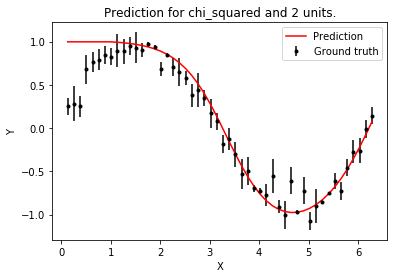

In [13]:
train_and_visualize(loss='chi_squared', optimizer='GD', epochs=100000, X=X, Y=Y, DY=DY, batch_size=-1,
                    hidden_units=2, learning_rate=0.00001, verbose=True, message_frequency=10000)

## 3 hidden units

Final loss function: 18356.96935052462


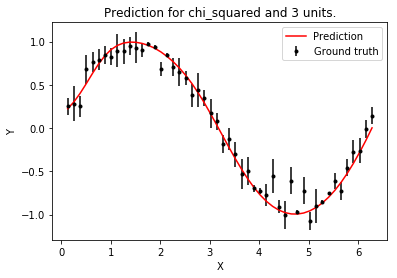

In [7]:
train_and_visualize(loss='chi_squared', optimizer='GD', epochs=100000, X=X, Y=Y, DY=DY, batch_size=-1,
                    hidden_units=3, learning_rate=0.00001, verbose=False)

## 4 hidden units

Final loss function: 18368.085859267514


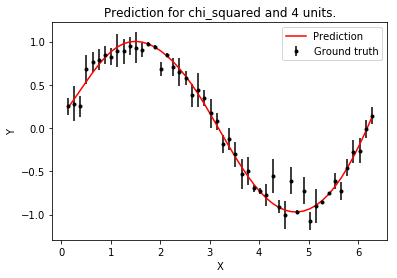

In [10]:
train_and_visualize(loss='chi_squared', optimizer='GD', epochs=100000, X=X, Y=Y, DY=DY, batch_size=-1,
                    hidden_units=4, learning_rate=0.00001, verbose=False)